# Hierarchical Clustering

## Assignment B
**Goal:** Implement Hierarchical clustering (not from scratch) and visualize the dendrogram.

**Dataset:** [Wine Dataset](https://paperswithcode.com/dataset/wine) (loaded via `sklearn.datasets`).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch

# Set random seed
np.random.seed(17)

## 1. Load and Prepare Data
We use the Wine dataset, which contains chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.

In [2]:
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Data shape: {X_scaled.shape}")

Data shape: (178, 13)


## 2. Dendrogram Visual Analysis
A dendrogram helps us decide the number of clusters by visualizing the hierarchy.

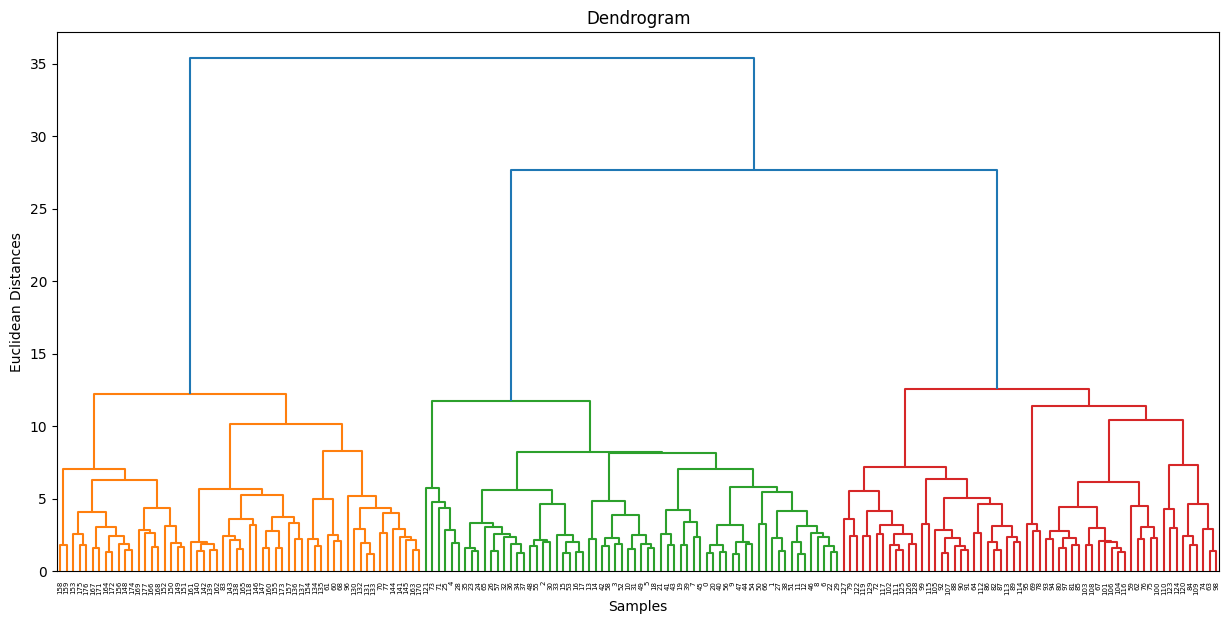

In [3]:
plt.figure(figsize=(15, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.xlabel("Samples")
plt.ylabel("Euclidean Distances")
plt.show()

## 3. Agglomerative Clustering
Based on the dendrogram (and knowing the ground truth is 3 classes), we fit the model with `n_clusters=3`.

In [4]:
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

# Evaluation Metrics
print(f"Silhouette Score: {silhouette_score(X_scaled, y_hc):.4f}")
print(f"Davies-Bouldin Score: {davies_bouldin_score(X_scaled, y_hc):.4f}")

Silhouette Score: 0.2774
Davies-Bouldin Score: 1.4186


## 4. Visual Analysis
Using PCA to visualize the clusters in 2D.

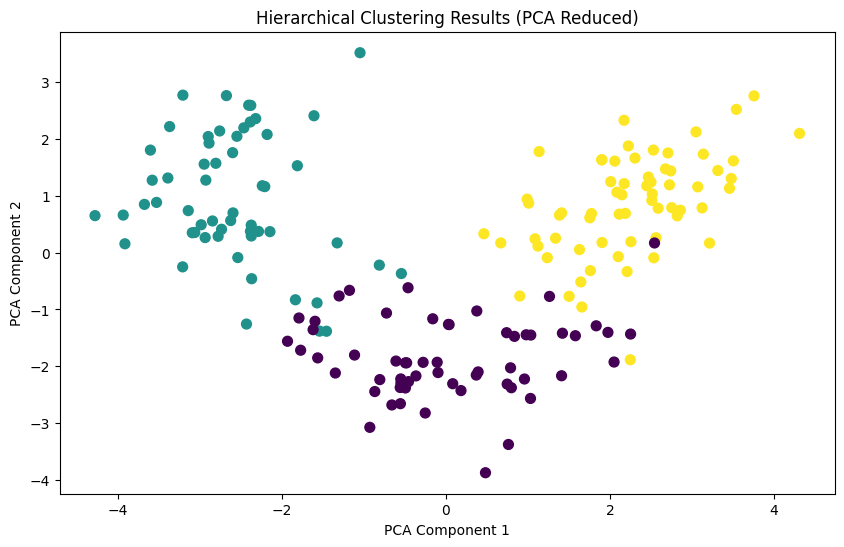

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hc, cmap='viridis', s=50)
plt.title('Hierarchical Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()